<a href="https://colab.research.google.com/github/milu234/Client-Projects/blob/master/mywalikngdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files  #Upload your file from your Computer then shift + Enter(Execute and next shell)
uploaded = files.upload()

Saving mywalkngdata.csv to mywalkngdata.csv


In [ ]:
pip install sensormotion   

  Created wheel for sensormotion: filename=sensormotion-1.1.4-cp36-none-any.whl size=19674 sha256=39e9604dec0e1d0e1f14fb134916a7de52695e77c0e3393b34f555b53f7d46de
  Stored in directory: /root/.cache/pip/wheels/37/fd/45/ab09232b95205e7fbacf21d60e3472e5b53a1adeee9c1d7711
Successfully built sensormotion


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import sensormotion as sm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)   #import librarries
import matplotlib.pyplot as plt # Plotting data
import seaborn as sns # Advanced visualization
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['mywalkngdata.csv']))  #the csv uploaded converted to dataframe (check the file name properly)

In [ ]:
df.tail(5) #chck the values

,time,x,y,z
1360,1.588060e+12,-2.298,5.554,4.367
1361,1.588060e+12,-2.145,6.512,5.746
1362,1.588060e+12,-2.221,6.320,6.933
1363,1.588060e+12,-2.068,6.359,6.742
1364,1.588060e+12,-2.260,6.359,5.439


In [ ]:
df.corr()  #check the values

,time,x,y,z
time,NaN,NaN,NaN,NaN
x,NaN,1.000000,-0.224438,0.425276
y,NaN,-0.224438,1.000000,-0.801059
z,NaN,0.425276,-0.801059,1.000000


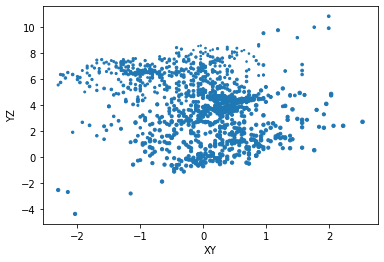

In [ ]:
plt.scatter(df.x, df.y, df.z)
plt.xlabel("XY")
plt.ylabel("YZ")              #Plot the graph

plt.show()

In [ ]:
sampling_rate = 1000
seconds = 10
time = np.arange(0, 1365)   # times in milliseconds
time

array([   0,    1,    2, ..., 1362, 1363, 1364])

In [ ]:
np.random.seed(123)

In [ ]:
x = df.x
y = df.y     #accessing the data set
z = df.z

In [ ]:
x = x.to_numpy()
y = y.to_numpy()
z = z.to_numpy()   

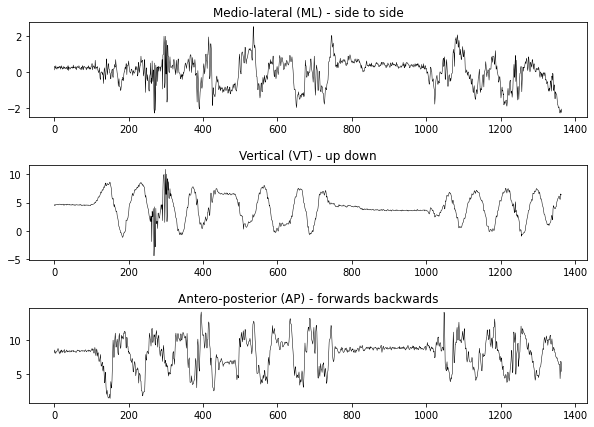

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,7))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.5, color='k')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.5, color='k')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.5, color='k')

fig.subplots_adjust(hspace=.5)

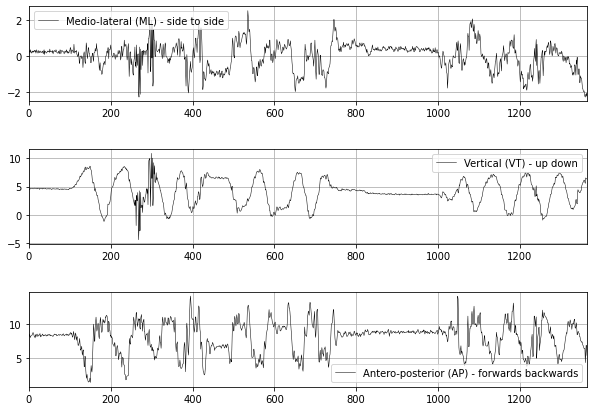

In [ ]:
sm.plot.plot_signal(time, [{'data': x, 'label': 'Medio-lateral (ML) - side to side', 'line_width': 0.5},
                           {'data': y, 'label': 'Vertical (VT) - up down', 'line_width': 0.5},
                           {'data': z, 'label': 'Antero-posterior (AP) - forwards backwards', 'line_width': 0.5}],
                    subplots=True, fig_size=(10,7))

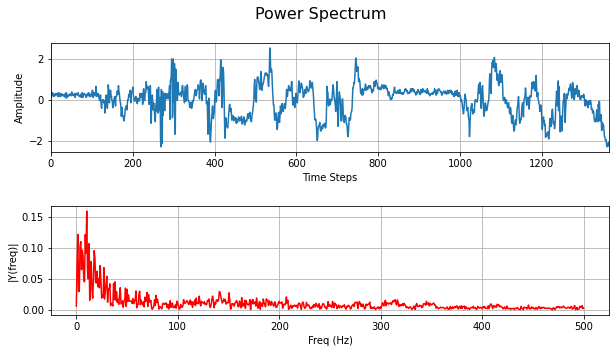

In [ ]:
_ = sm.signal.fft(x, sampling_rate, plot=True)

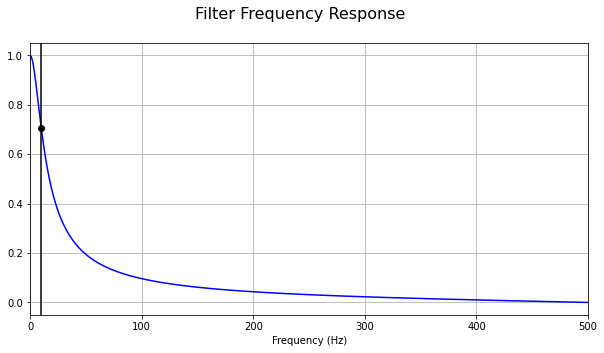

In [ ]:

sm.plot.plot_filter_response(10, sampling_rate, 'low', filter_order=1)

In [ ]:
# Build the filter
b, a = sm.signal.build_filter(1, sampling_rate, 'low', filter_order=4)

# Filter signals
x_f = sm.signal.filter_signal(b, a, x)  # ML medio-lateral
y_f = sm.signal.filter_signal(b, a, y)  # VT vertical
z_f = sm.signal.filter_signal(b, a, z)  # AP antero-posterior

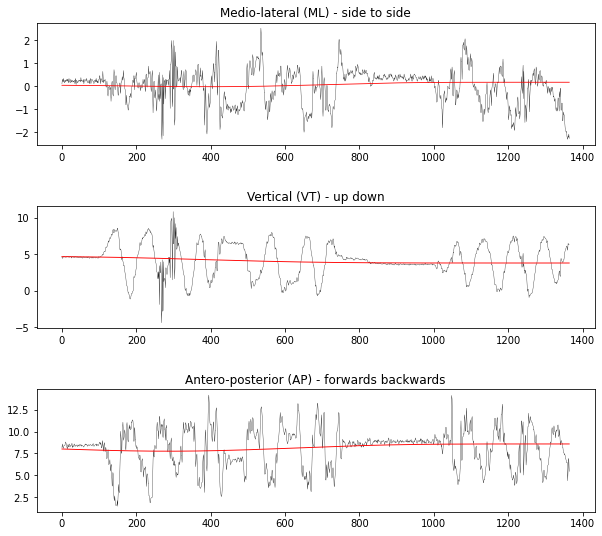

In [ ]:
# Create plots with overlaid filtered signals (in red)
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,9))

ax[0].set_title('Medio-lateral (ML) - side to side')
ax[0].plot(time, x, linewidth=0.3, color='k')
ax[0].plot(time, x_f, linewidth=0.8, color='r')

ax[1].set_title('Vertical (VT) - up down')
ax[1].plot(time, y, linewidth=0.3, color='k')
ax[1].plot(time, y_f, linewidth=0.9, color='r')

ax[2].set_title('Antero-posterior (AP) - forwards backwards')
ax[2].plot(time, z, linewidth=0.3, color='k')
ax[2].plot(time, z_f, linewidth=0.9, color='r')

fig.subplots_adjust(hspace=.5)

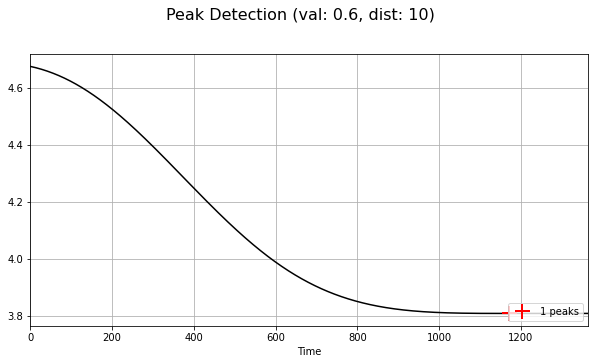

In [ ]:
peak_times, peak_values = sm.peak.find_peaks(time, y_f, peak_type='valley', min_val=0.6, min_dist=10, plot=True)

In [ ]:
step_count = sm.gait.step_count(peak_times)
cadence = sm.gait.cadence(time, peak_times)
step_time, step_time_sd, step_time_cov = sm.gait.step_time(peak_times)

print(' - Number of steps: {}'.format(step_count))
print(' - Cadence: {:.2f} steps/min'.format(cadence))
print(' - Mean step time: {:.2f}ms'.format(step_time))
print(' - Step time variability (standard deviation): {:.2f}'.format(step_time_sd))
print(' - Step time variability (coefficient of variation): {:.2f}'.format(step_time_cov))

 - Number of steps: 1
 - Cadence: 43.99 steps/min
 - Mean step time: nanms
 - Step time variability (standard deviation): nan
 - Step time variability (coefficient of variation): nan


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


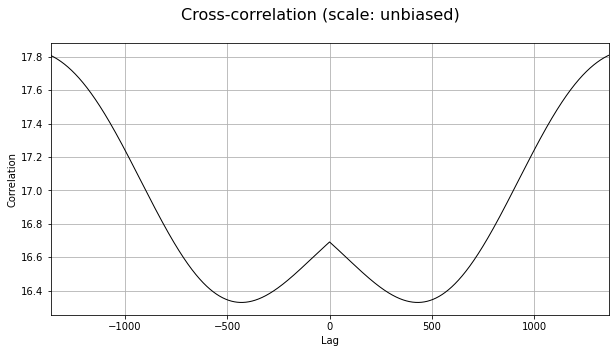

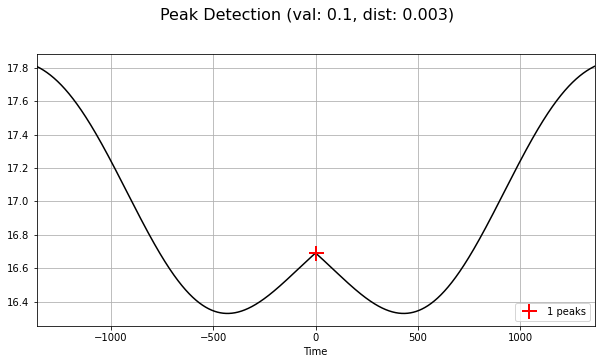

AssertionError: ignored

In [ ]:
ac, ac_lags = sm.signal.xcorr(y_f, y_f, scale='unbiased', plot=True)

ac_peak_times, ac_peak_values = sm.peak.find_peaks(ac_lags, ac, peak_type='peak', min_val=0.1, min_dist=0.003, plot=True)
ac_peak_values

step_reg, stride_reg = sm.gait.step_regularity(ac_peak_values)
step_sym = sm.gait.step_symmetry(ac_peak_values)

print(' - Step regularity: {:.4f}'.format(step_reg))
print(' - Stride regularity: {:.4f}'.format(stride_reg))
print(' - Step symmetry: {:.4f}'.format(step_sym))
